In [102]:
import numpy as np
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt
import os

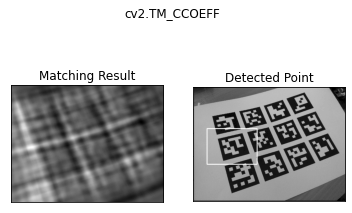

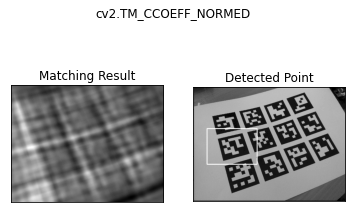

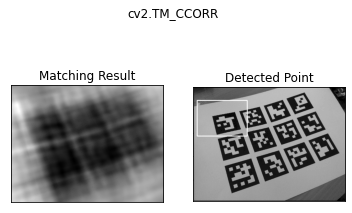

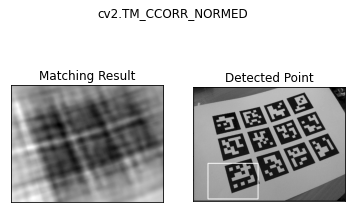

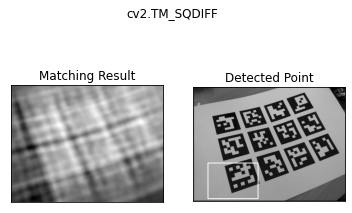

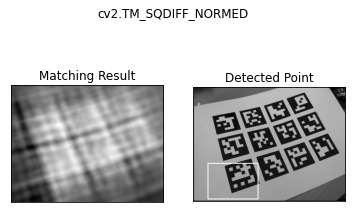

In [19]:
img = cv2.imread('photo.png',0)
img2 = img.copy()
template = cv2.imread('photo2.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [109]:
#Определение порога корреляции threshold
img = cv2.imread('ii1.png',0) #Снимок беспилотника
img2 = img.copy()
for filename in os.listdir(f'E:/Data_Science/datasets//signs'):
    sign = f'E:/Data_Science/datasets/audio/signs/{filename}' #Файл знака, 1 из 15
    template = cv2.imread(sign ,0)
    w, h = template.shape[::-1]
     
    res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.5
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    cv2.imwrite(f'res{filename}.png',img_rgb)

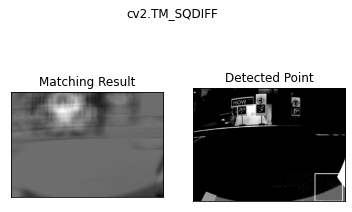

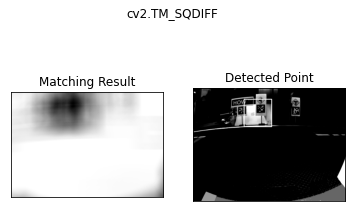

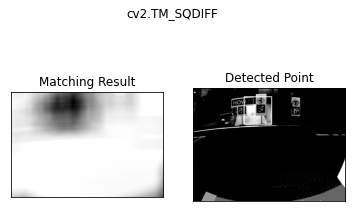

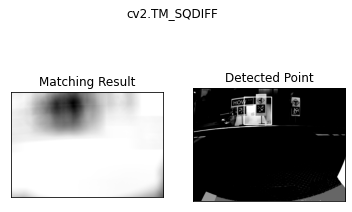

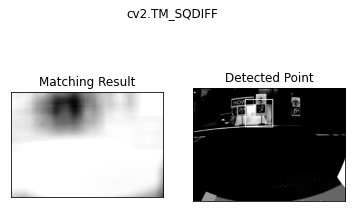

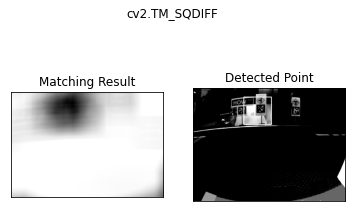

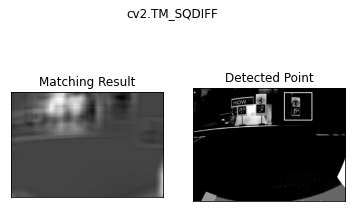

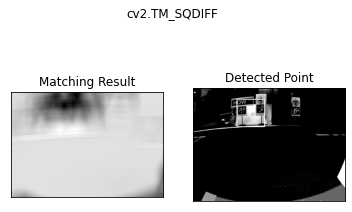

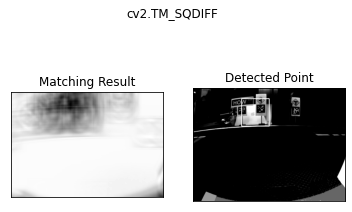

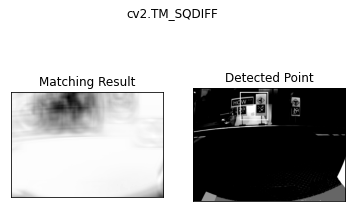

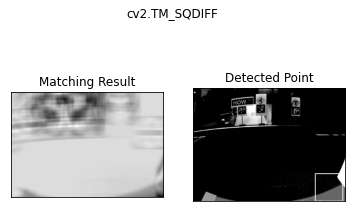

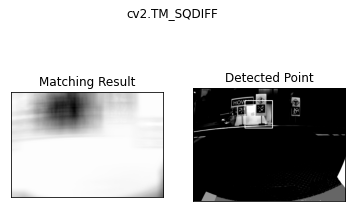

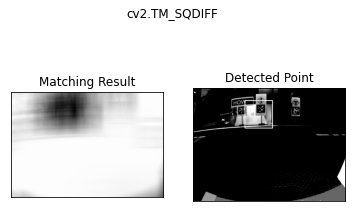

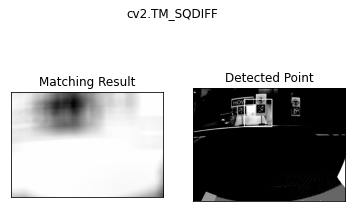

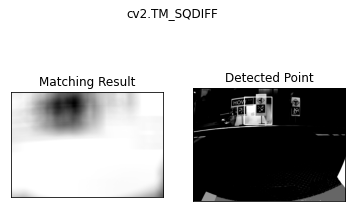

In [113]:
img = cv2.imread('ii1.png',0)
img2 = img.copy()
for filename in os.listdir(f'E:/Data_Science/datasets/audio/signs'):
    sign = f'E:/Data_Science/datasets/audio/signs/{filename}'
    template = cv2.imread(sign ,0)
    w, h = template.shape[::-1]
    
    
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

    for meth in methods:
        img = img2.copy()
        method = eval(meth)

        res = cv2.matchTemplate(img,template,method)
        
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = (max_loc[0]-w, max_loc[1])
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img,top_left, bottom_right, 255, 2)

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()

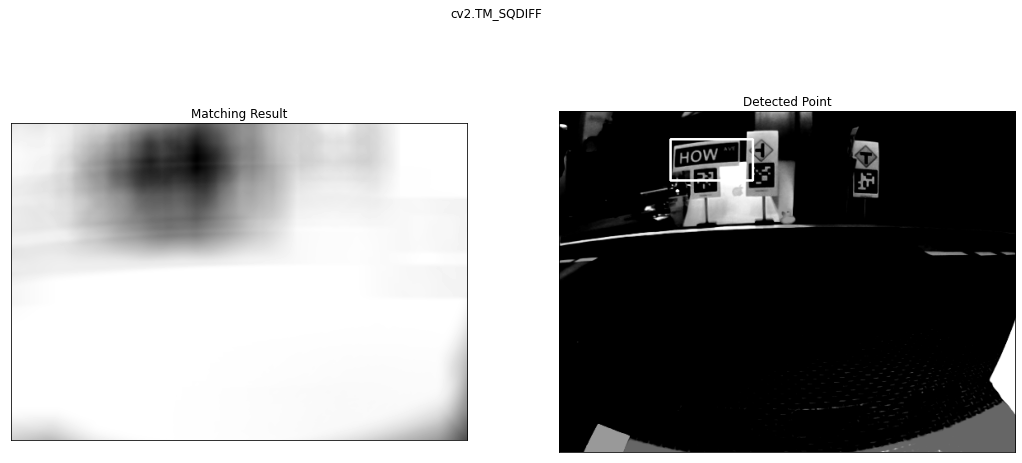

In [170]:
#Сегментация

img = cv2.imread('ii1.png',0)
img2 = img.copy()
template = cv2.imread('i11.png',0)
w, h = template.shape[::-1]

methods = [ 'cv2.TM_SQDIFF']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    


    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = (min_loc[0]-w//2 , min_loc[1] )

    else:
        top_left = (max_loc[0], max_loc[1])
    
    bottom_right = (top_left[0] + w, top_left[1] + h//2)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(18,8))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()